<h1>20156042 Kim GaYoung</h1>

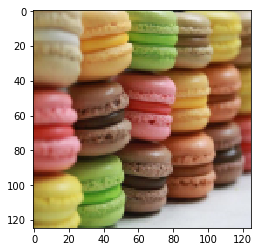

In [37]:
import PIL.Image as pilimg
import matplotlib.pyplot as plt
import numpy as np
import random
 
# Read image
im = pilimg.open('img1.jpg')

# Fetch image pixel data to numpy array
pix = np.array(im)
plt.imshow(pix)

In [38]:
size_row = len(pix)
size_col = len(pix[0,:])

row_table = np.zeros((size_row,size_col),dtype = 'float')
col_table = np.zeros((size_row,size_col),dtype = 'float')

color_table = np.zeros((size_row,size_col,3),dtype = 'float')

# position를 0~1로 normalize
for i in range(size_row): 
    for j in range(size_col):
        row_table[i][j] = i/(size_row-1)
        col_table[i][j] = j/(size_col-1)

# RGB를 0~1로 normalize
for i in range(size_row):
    for j in range(size_col):
        color_table[i][j] = pix[i][j] / 255

table_label  = np.zeros((size_row , size_col), dtype='int')


In [43]:
#norm 2
def norm_2(x, y):
    d = (x - y) ** 2
    s = np.sum(d)
    r = np.sqrt(s)
    return(r)

def color_initial(centeroids,k):
    for i in range(k):
        for j in range(3):
            centeroids[i][j] = random.randrange(0,255) / float(255)
            
def position_initial(centeroids,k):
    for i in range(k):
        centeroids[i][0] = random.randrange(0,size_row) / float(size_row-1)
        centeroids[i][1] = random.randrange(0,size_col) / float(size_col-1)
            
#find min distance
def min_dst(temp,k,x,y):
    min = temp[0]
    table_label[x,y] = 0
    for i in range(k):
        if temp[i] < min:
            min = temp[i]
            table_label[x,y] = i  #centroid of x-th data is i
    return min

def Image(centeroids):
    output = np.zeros((size_row,size_col,3),dtype = 'uint8')
    
    plt.title('Output image for each $K$')
    for i in range(size_row):
        for j in range(size_col):
            for m in range(3):
                output[i][j][m] = int(centeroids[table_label[i][j],m] * 255)
                
    plt.imshow(output)
    
def Energy(energy):
    plt.title('Energy curve for each $K$')
    plt.plot(energy,'ro-')
    plt.show()

In [44]:
def k_means(k , lamda):
    temp = np.zeros(k,dtype = 'float')
    
    color_centeroids = np.zeros((k,3),dtype = 'float')
    c_pre_centeroids = np.zeros((k,3),dtype = 'float')
    
    position_centeroids = np.zeros((k,2),dtype = 'float')
    p_pre_centeroids = np.zeros((k,2),dtype = 'float')
    
    energy = []
    
    iteration = 0
    dst = np.zeros((size_row,size_col),dtype = 'float')
    
    
    
    color_initial(color_centeroids,k)
    position_initial(position_centeroids,k)
    
    
    while(not(np.array_equal(color_centeroids,c_pre_centeroids))):
        color_avg = np.zeros((k,3),dtype='float')
        position_avg = np.zeros((k,2),dtype = 'float')
        cnt = np.zeros(k,dtype='int')   # avg / cnt
        
        c_pre_centeroids = color_centeroids
        p_pre_centeroids = position_centeroids
        iteration += 1
        
        #calculate each pixel and centeroid ' s distance(group) 
        for i in range(size_row):
            for j in range(size_col):
                for m in range(k):
                    point = np.array(row_table[i][j], col_table[i][j])
                    
                    temp[m] = norm_2(color_table[i,j,:],color_centeroids[m,:])
                    temp[m] += lamda * norm_2(point,position_centeroids[m,:])
                    
                dst[i,j] = min_dst(temp,k,i,j)
                
        
            
        #change centeroids
        for i in range(size_row):
            for j in range(size_col):
                color_avg[table_label[i,j],:] += color_table[i,j,:]
                position_avg[table_label[i,j],0] += row_table[i][j]
                position_avg[table_label[i,j],1] += col_table[i][j]
                
                cnt[table_label[i,j]] += 1
                
        for i in range(k):
            if cnt[i] != 0:
                color_avg[i,:] = color_avg[i,:] / cnt[i]
                position_avg[i,:] = position_avg[i,:] / cnt[i]
        
        color_centeroids = color_avg
        posigion_centeroids = position_avg
        
        energy.append(np.sum(dst))
        
    
    Energy(energy)
    Image(color_centeroids)
    print(iteration)

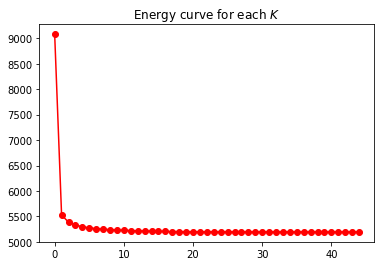

45


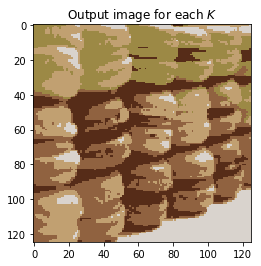

In [45]:
# k = 5 , lamda = 0.5
k_means(5,0.5)

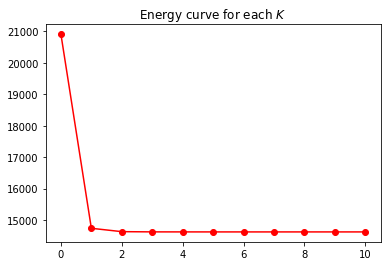

11


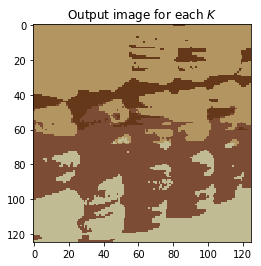

In [47]:
# k = 5 , lamda = 2
k_means(5,2)

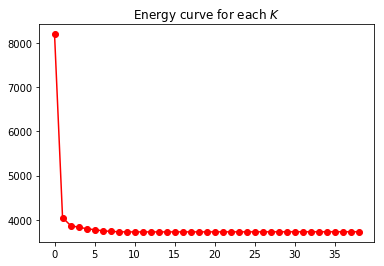

39


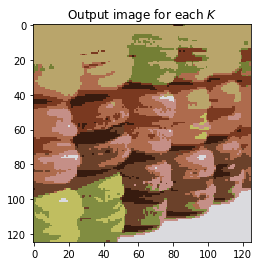

In [48]:
# k = 10 , lamda = 0.5
k_means(10,0.5)

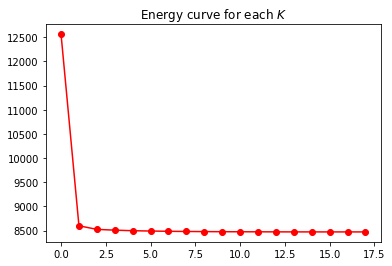

18


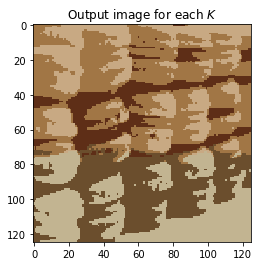

In [50]:
# k = 10 , lamda = 1.5
k_means(10,1.5)

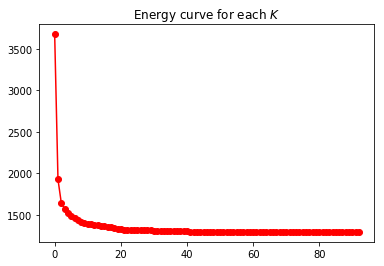

93


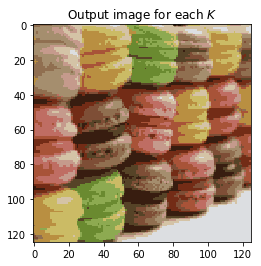

In [51]:
# k = 15 , lamda = 0
k_means(15,0)

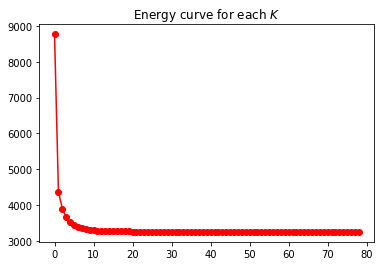

79


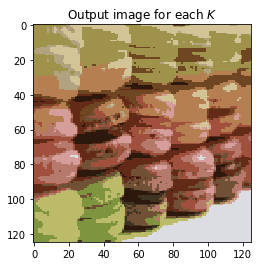

In [52]:
# k = 15 , lamda = 0.5
k_means(15,0.5)

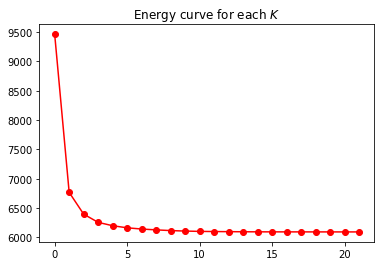

22


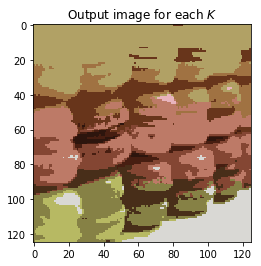

In [53]:
# k = 10 , lamda = 1.5
k_means(15,1.5)